In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
players = pd.read_csv("WorldCupPlayers.csv")
matches = pd.read_csv("datasets_19728_29747_WorldCupMatches.csv")
world_cups = pd.read_csv("datasets_19728_29747_WorldCups.csv")
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


# Clean Data

Replace "Germany DR" and "Germany FR" team by "Germany" team, replace "Soviet Union" team by "Russia" team

In [3]:
ide =  matches[matches["Home Team Name"] == "Germany FR"].index
arr = matches["Home Team Name"].to_numpy()
for i in ide:
    arr[i] = "Germany"
ide = matches[matches["Home Team Name"] == "Soviet Union"].index
for i in ide:
    arr[i] = "Russia"
ide = matches[matches["Home Team Name"] == "German DR"].index
for i in ide:
    arr[i] = "Germany"

In [4]:
ide =  matches[matches["Away Team Name"] == "Germany FR"].index
arr1 = matches["Away Team Name"].to_numpy()
for i in ide:
    arr1[i] = "Germany"
ide = matches[matches["Away Team Name"] == "Soviet Union"].index
for i in ide:
    arr1[i] = "Russia"
ide = matches[matches["Away Team Name"] == "German DR"].index
for i in ide:
    arr1[i] = "Germany"

In [5]:
matches = matches.drop(labels = ["Home Team Name","Away Team Name"], axis = 1)
matches.insert(loc = 1, column = "Home Team Name", value = arr)
matches.insert(loc = 4, column = "Away Team Name", value = arr1)
matches.head()

,Year,Home Team Name,Datetime,Stage,Away Team Name,Stadium,City,Home Team Goals,Away Team Goals,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,France,13 Jul 1930 - 15:00,Group 1,Mexico,Pocitos,Montevideo,4.0,1.0,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,USA,13 Jul 1930 - 15:00,Group 4,Belgium,Parque Central,Montevideo,3.0,0.0,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,Yugoslavia,14 Jul 1930 - 12:45,Group 2,Brazil,Parque Central,Montevideo,2.0,1.0,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,Romania,14 Jul 1930 - 14:50,Group 3,Peru,Pocitos,Montevideo,3.0,1.0,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,Argentina,15 Jul 1930 - 16:00,Group 1,France,Parque Central,Montevideo,1.0,0.0,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [7]:
matches.head()
#players.MatchID in
df0 = pd.DataFrame()
arr = matches[matches.Stage=="Final"]["MatchID"].to_numpy()
for i in arr:
    df0 = df0.append(players[players.MatchID==i])
df0.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
643,405,1087,URU,SUPPICI Alberto (URU),S,0,Enrique BALLESTRERO,GK,NaN
644,405,1087,ARG,OLAZAR Francisco (ARG),S,0,Juan BOTASSO,GK,NaN
645,405,1087,URU,SUPPICI Alberto (URU),S,0,Hector CASTRO,NaN,G89'
646,405,1087,ARG,OLAZAR Francisco (ARG),S,0,Francisco VARALLO,NaN,NaN
647,405,1087,URU,SUPPICI Alberto (URU),S,0,Pedro CEA,NaN,G57'


# EDA

In [8]:
label = ["Winner","Runners-Up","Third","Fourth"]
k = 2
for i in label:
    ide =  world_cups[world_cups[i] == "Germany FR"].index
    arr = world_cups[i]
    for j in ide:
        arr[j] = "Germany"
    ide =  world_cups[world_cups[i] == "Soviet Union"].index
    for j in ide:
        arr[j] = "Russia"
    ide =  world_cups[world_cups[i] == "German DR"].index
    for j in ide:
        arr[j] = "Germany"
    world_cups = world_cups.drop(labels = i, axis = 1)
    world_cups.insert(loc = k, column = i, value = arr)
    k = k + 1

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [9]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


In [10]:
players.info()
len(players["Player Name"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
RoundID          37784 non-null int64
MatchID          37784 non-null int64
Team Initials    37784 non-null object
Coach Name       37784 non-null object
Line-up          37784 non-null object
Shirt Number     37784 non-null int64
Player Name      37784 non-null object
Position         4143 non-null object
Event            9069 non-null object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


7663

In [11]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
Year                    852 non-null float64
Home Team Name          852 non-null object
Datetime                852 non-null object
Stage                   852 non-null object
Away Team Name          852 non-null object
Stadium                 852 non-null object
City                    852 non-null object
Home Team Goals         852 non-null float64
Away Team Goals         852 non-null float64
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Home Goals    852 non-null float64
Half-time Away Goals    852 non-null float64
Referee                 852 non-null object
Assistant 1             852 non-null object
Assistant 2             852 non-null object
RoundID                 852 non-null float64
MatchID                 852 non-null float64
Home Team Initials      852 non-null object
Away Team Initials      852 non-null object
dtype

In [12]:
world_cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
Year              20 non-null int64
Country           20 non-null object
Winner            20 non-null object
Runners-Up        20 non-null object
Third             20 non-null object
Fourth            20 non-null object
GoalsScored       20 non-null int64
QualifiedTeams    20 non-null int64
MatchesPlayed     20 non-null int64
Attendance        20 non-null object
dtypes: int64(4), object(6)
memory usage: 1.6+ KB


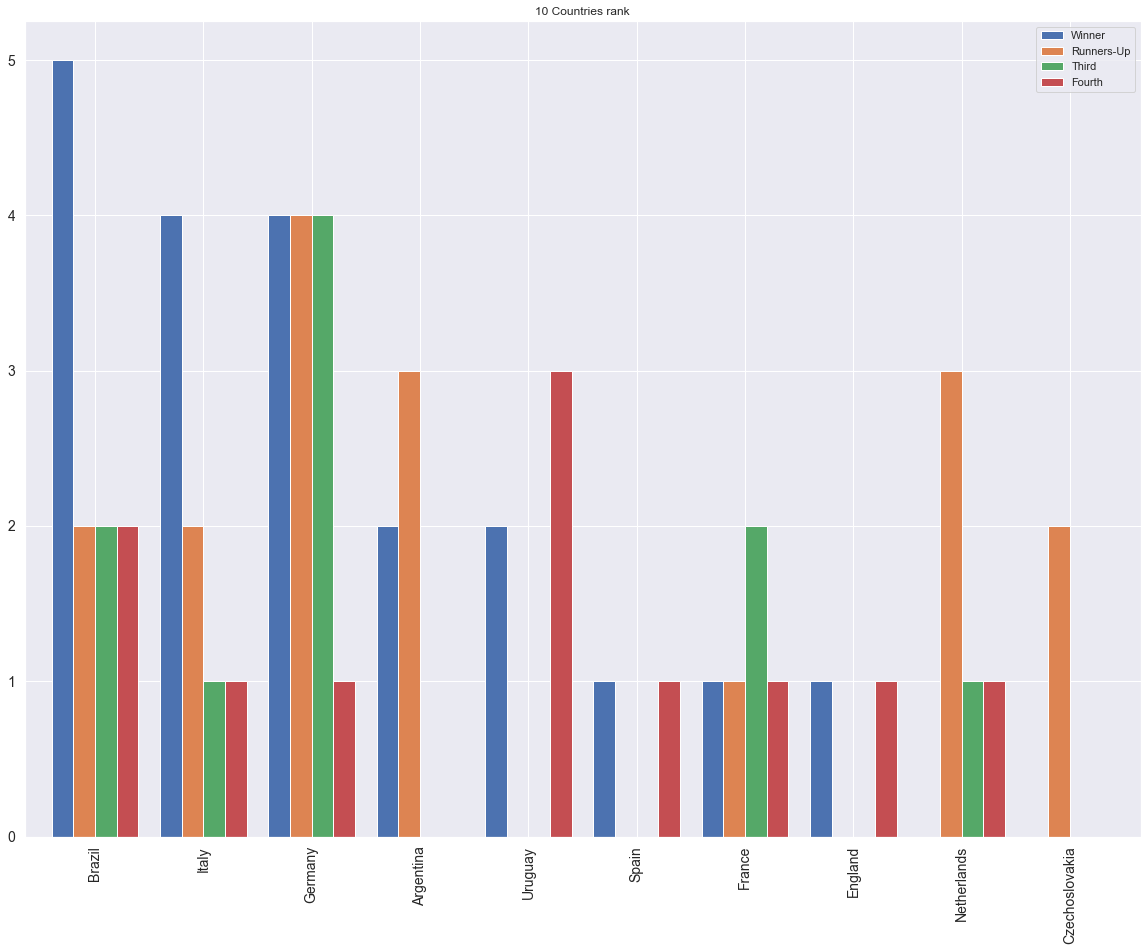

In [13]:
st = world_cups["Winner"].value_counts()
nd = world_cups["Runners-Up"].value_counts()
rd = world_cups["Third"].value_counts()
th = world_cups["Fourth"].value_counts()
frame = [st,nd,rd,th]
prize = pd.concat(frame, axis = 1, sort = False).fillna(0)
#prize.head(10)
prize[:10].plot(y = ["Winner","Runners-Up","Third","Fourth"], kind = "bar", figsize = (20,15), fontsize = 14, width = 0.8)
plt.title("10 Countries rank")
plt.show()

In [14]:
ar1 = matches["Home Team Name"].unique()
ar2 = matches["Away Team Name"].unique()

In [15]:
for i in ar2:
    if i not in ar1:
        print(i)

Egypt
Dutch East Indies
Israel
El Salvador
Kuwait
nan


In [16]:
ar3 = []
for i in ar2:
    a1 = matches[matches["Home Team Name"]==i]["Home Team Goals"].sum()
    a2 = matches[matches["Away Team Name"]==i]["Away Team Goals"].sum()
    ar3.append(a1+a2)
d = {"Team Name":ar2, "Total Goals":ar3}
goals = pd.DataFrame(d).dropna()
goals = goals.sort_values(by = "Total Goals", ascending = False)
goals.head()

,Team Name,Total Goals
19,Germany,240.0
2,Brazil,225.0
11,Argentina,133.0
25,Italy,128.0
4,France,108.0


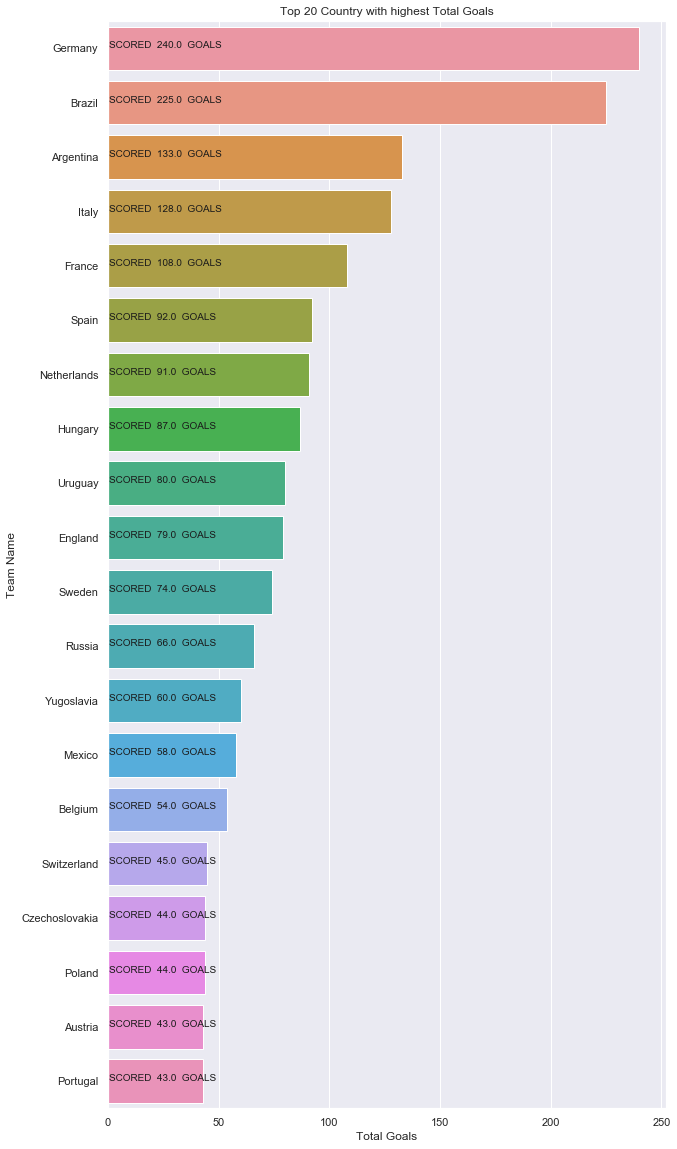

In [17]:
plt.figure(figsize=(10,20))
ax = sns.barplot(x = "Total Goals", y = "Team Name", data = goals[:20])
for i,j in enumerate("SCORED  " +goals["Total Goals"][:20].astype(str) + "  GOALS"):
    ax.text(0.7,i,j,fontsize = 10,color="k")
plt.title("Top 20 Country with highest Total Goals")
plt.show()

In [18]:
pen = players[players["Event"].str.contains("P").fillna(False)]
label = list(pen[pen.Event.str.contains("MP").fillna(False)].index)
label1 = list(pen[pen.Event.str.contains("G").fillna(False)].index)
label.extend(label1)
pen = pen.drop(labels = label)
pen.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
708,204,1104,FRA,KIMPTON George (ENG),S,0,Georges VERRIEST,NaN,P116'
1140,418,1106,HUN,NADAS Odon (HUN),S,0,Gyorgy SAROSI,NaN,P60'
1604,206,1150,POL,KALUZA Jozef (POL),S,0,Fryedryk SZERFKE,NaN,P23'
1783,429,1152,TCH,MEISSNER Vaclav (TCH),S,0,Oldrich NEJEDLY,NaN,P65'
2033,3489,1149,ITA,POZZO Vittorio (ITA),S,0,Giuseppe MEAZZA,C,P60'


In [19]:
goal1 = players[players["Event"].str.contains("G").fillna(False)]
label = list(players[players["Event"].str.contains("OG").fillna(False)].index)
goal1 = goal1.drop(labels = label)
goal1 = goal1.append(pen)
goal1
df_count = goal1.groupby(["Player Name","Team Initials","Event","MatchID"]).count().reset_index().iloc[:,:4]
#Goal event by players
df_count.head()

,Player Name,Team Initials,Event,MatchID
0,A. AYEW,GHA,G54',300186493
1,A. AYEW,GHA,G82',300186512
2,A. DELGADO,ECU,G54',97410018
3,A. DELGADO,ECU,G80' O83',97410002
4,A. GUARDADO,MEX,G75' O84',300186452


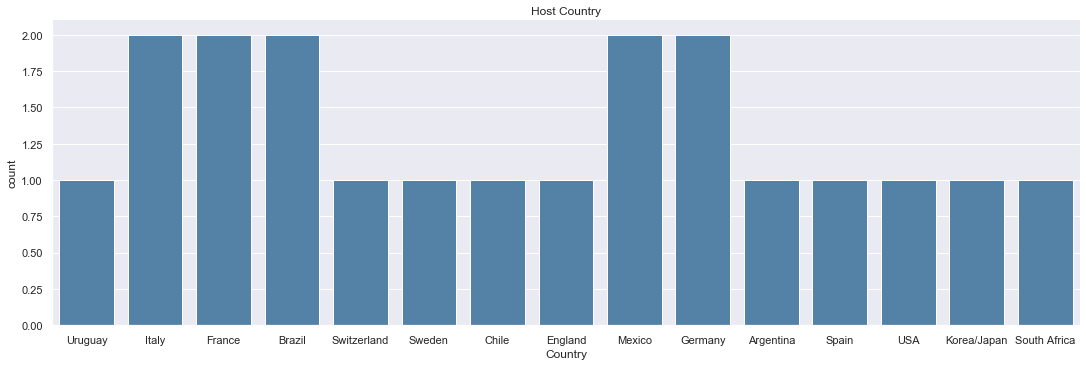

In [20]:
sns.catplot("Country", data = world_cups, kind = "count", color = "steelblue", aspect = 3)
plt.title("Host Country")
plt.show()

In [21]:
cols = ["Year","Home Team Name","Home Team Goals","Away Team Goals","Away Team Name","Win conditions"
        ,"Half-time Home Goals","Half-time Away Goals"]
Outcome = matches.loc[:,cols].dropna()

In [22]:
Outcome.tail()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals
847,2014.0,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),0.0,0.0
848,2014.0,Brazil,1.0,7.0,Germany,,0.0,5.0
849,2014.0,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),0.0,0.0
850,2014.0,Brazil,0.0,3.0,Netherlands,,0.0,2.0
851,2014.0,Germany,1.0,0.0,Argentina,Germany win after extra time,0.0,0.0


The number of games Home Team win is 529 taking 73.06629834254143 %


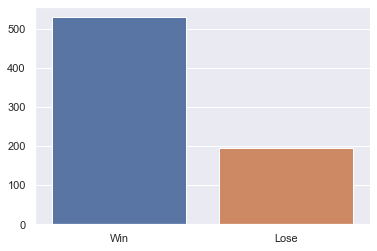

In [23]:
win = (Outcome["Home Team Goals"] > Outcome["Away Team Goals"]).sum()
lose = (Outcome["Home Team Goals"] < Outcome["Away Team Goals"]).sum()
extra = Outcome[Outcome["Win conditions"].str.contains("win")].reset_index()
for i in range(len(extra)):
    if (extra.loc[i,"Home Team Name"] in extra.loc[i,"Win conditions"]):
        win = win + 1
    else: 
        lose = lose + 1
print("The number of games Home Team win is " + str(win) + " taking "+ str(win/(win + lose)*100) + " %")
data1 = {"Home Team Win":win, "Home Team Lose":lose}
sns.barplot(x = ["Win","Lose"], y = [win,lose])
plt.show()

In [24]:
country = []
for i in matches["Away Team Name"].unique():
    if i not in matches["Home Team Name"].unique():
        country.append(i)
def fillna(g1,g2):
        g = (g1 + g2).fillna(-1)
        ar = g[g==-1].index
        for i in ar:
            if i not in g1.index:
                g.loc[i] = g2.loc[i]
            else:
                g.loc[i] = g1.loc[i]
        return g
goal_per_game = pd.DataFrame()
for k in Outcome["Away Team Name"].unique():
    g1 = Outcome[Outcome["Home Team Name"] == k].groupby("Year")["Home Team Goals"].sum()
    g2 = Outcome[Outcome["Away Team Name"] == k].groupby("Year")["Away Team Goals"].sum()
    x = matches.groupby(["Away Team Name","Year"]).count()["Datetime"][k]
    if k in country:
        y = pd.Series()
    else:
        y = matches.groupby(["Home Team Name","Year"]).count()["Datetime"][k]
    df = (fillna(g1,g2)/fillna(x,y)).to_frame().rename(columns = {0:k})
    goal_per_game = pd.concat([goal_per_game,df], axis = 1)
goal_per_game = goal_per_game.fillna(0)
goal_per_game.reset_index()

,Year,Mexico,Belgium,Brazil,Peru,France,Bolivia,Paraguay,Romania,Chile,...,Czech Republic,Ghana,Togo,Ukraine,"rn"">Trinidad and Tobago","rn"">Serbia and Montenegro",Angola,Slovakia,Serbia,"rn"">Bosnia and Herzegovina"
0,1930.0,1.333333,0.000000,2.500000,0.500000,1.333333,0.000000,0.500000,1.500000,1.666667,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000
1,1934.0,0.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000
2,1938.0,0.000000,1.000000,2.800000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000
3,1950.0,0.666667,0.000000,3.666667,0.000000,0.000000,0.000000,1.000000,0.000000,1.666667,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000
4,1954.0,1.000000,2.500000,2.666667,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000
5,1958.0,0.333333,0.000000,2.666667,0.000000,3.833333,0.000000,3.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000
6,1962.0,1.000000,0.000000,2.333333,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000
7,1966.0,0.333333,0.000000,1.333333,0.000000,0.666667,0.000000,0.000000,0.000000,0.666667,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000
8,1970.0,1.500000,1.333333,3.166667,2.250000,0.000000,0.000000,0.000000,1.333333,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000
9,1974.0,0.000000,0.000000,0.857143,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000


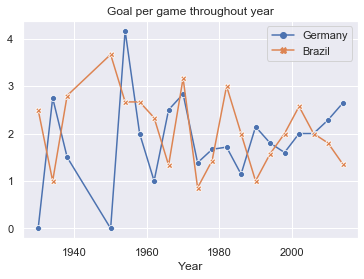

In [25]:
Mean = goal_per_game.mean()
sns.lineplot(data = goal_per_game.loc[:,["Germany","Brazil"]],markers= True, dashes = False)
plt.title("Goal per game throughout year")
plt.show()

In [26]:
count = 0
for i in Outcome["Home Team Name"].unique():
    if i not in Outcome["Away Team Name"].unique():
        count = count + 1
print("There are " + str(count) + " team which is not in the Away Team")

There are 0 team which is not in the Away Team


In [27]:
part = Outcome.groupby("Away Team Name")["Year"].unique().apply(lambda x: len(x)).to_frame().rename_axis(index = {"Away Team Name":"Team Name"}).rename(columns = {"Year":"Number of Years Participate"}).sort_values(by = ["Number of Years Participate"],ascending = False)

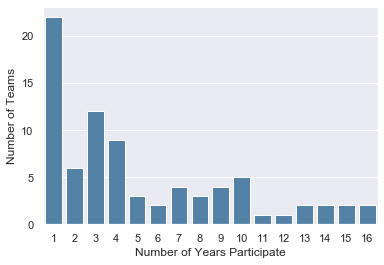

In [28]:
a = part.reset_index().groupby("Number of Years Participate").count().reset_index()
a = a.rename(columns = {"Team Name":"Number of Teams"})
sns.barplot(x = "Number of Years Participate", y = "Number of Teams", data = a, color = "steelblue")

In [29]:
part.head()

,Number of Years Participate
Team Name,
Germany,16
Argentina,16
Brazil,15
Mexico,15
Italy,14


In [30]:
#link to google studio
#https://datastudio.google.com/s/lCVQ6JRPSlI